In [1]:
import netCDF4 as nc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import xarray as xr
from scipy.interpolate import interp1d

%matplotlib inline
plt.rcParams.update({'font.size': 12})

In [2]:
filename = '/Users/gabriel/Desktop/DATA-LASP/tuc_dmin.nc'
dataset = nc.Dataset(filename)



In [3]:
ds = xr.open_dataset(filename)
df = ds.to_dataframe()
df.reset_index(inplace=True)

In [10]:
#print(dataset)
#for dim in dataset.dimensions.values():
    #print(dim)
#for var in dataset.variables.values():
    #print(var)

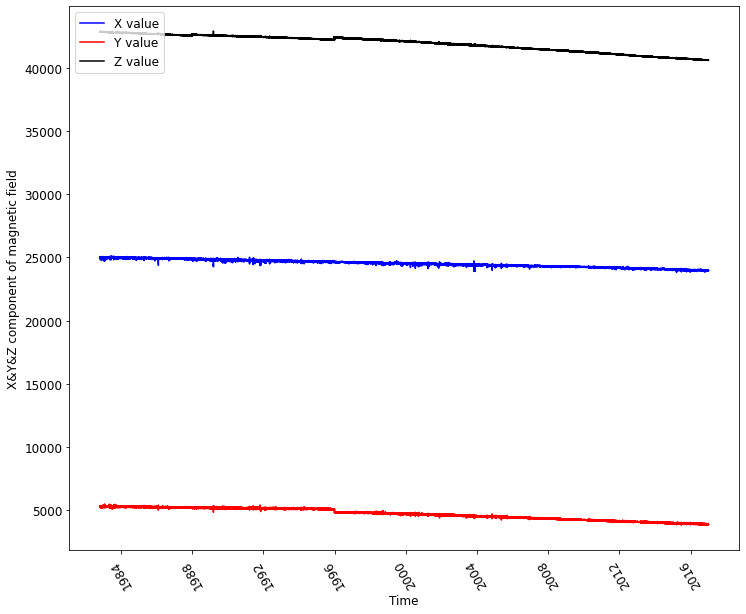

In [14]:
#plt.figure(figsize=(12,10))
#Magnetic North
#plt.plot(df['Time'], df['X'], label='X value', color='blue')
#East
#plt.plot(df['Time'],df['Y'], label='Y value', color='red')
#Down
#plt.plot(df['Time'],df['Z'], label='Z value', color='black')
#plt.xlabel('Time')
#plt.ylabel('X&Y&Z component of magnetic field')
#plt.xticks(rotation=120)
#plt.legend(loc='best')
#plt.show()

In [15]:
##Making a flag method and a interpolation method

df['flag'] = 0
df['flag'][df['X'].isna()==True] = 1
df['flag'].sum()


df['filled_cubic'] = df['X'].interpolate(kind='cubic')

/var/folders/nj/1lttj3_x16ldy51707n65swm0000gn/T/ipykernel_45330/315216371.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'][df['X'].isna()==True] = 1


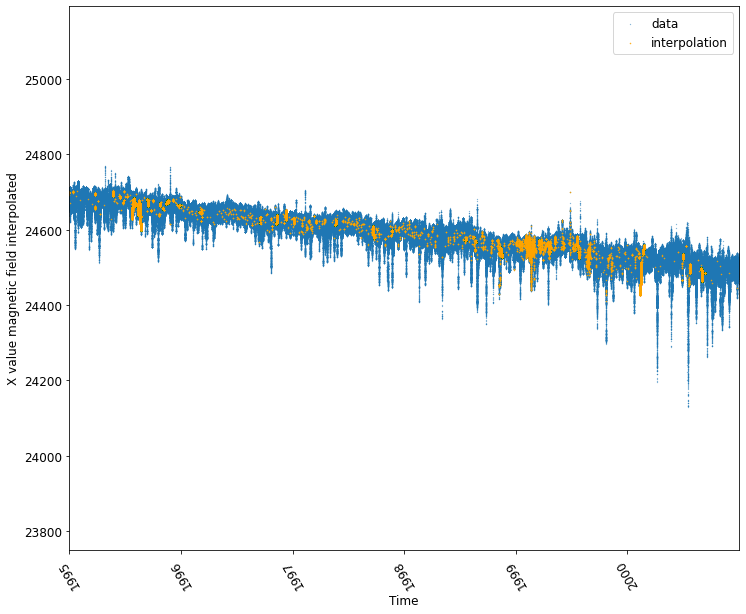

In [17]:
plt.figure(figsize=(12,10))

##Calling on plot to make data interpolated
plt.scatter(df['Time'], df['X'], label='data', s=.05)
plt.scatter(df['Time'][df['flag']==True], df['filled_cubic'][df['flag']==True], 
            label='interpolation', color='orange', s=.25)
##Making a specific timeframe for data plot
plt.xlim([datetime.date(1995, 1, 1), datetime.date(2000, 12, 31)])

plt.xlabel('Time')
plt.ylabel('X value magnetic field interpolated')
plt.xticks(rotation=120)
plt.legend(loc='best')


In [18]:
##Anomoly detection via rolling mean and std
xmean = df['X'].rolling(50).mean()
xstd = df['X'].rolling(50).std()


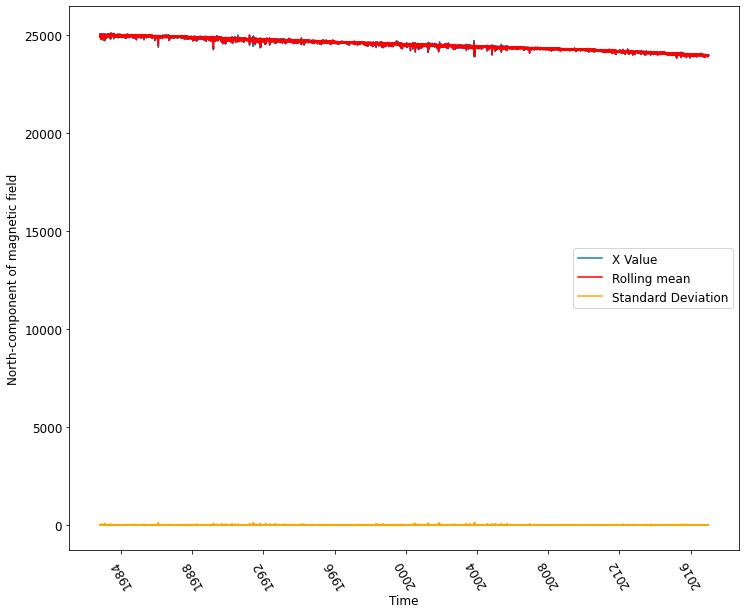

In [25]:
plt.figure(figsize=(12,10))

plt.plot(df['Time'], df['X'], label='X Value')
##Plotting rolling mean
plt.plot(df['Time'], xmean, color='red', label='Rolling mean')
##Plotting rolling std
plt.plot(df['Time'], xstd, color='orange', label='Standard Deviation')
##This will fill between rolling mena and std, so we can see if any data is outside the fill
plt.fill_between(df['Time'], xmean-3*xstd, xmean+3*xstd, alpha=0.5)

plt.xlabel('Time')
plt.ylabel('North-component of magnetic field')

plt.xticks(rotation=120)
plt.legend()

In [28]:
##Lets check the dropouts by building an index list

df_tuc = df[df['Time'] < pd.Timestamp(2016, 12, 31)]
inds_tuc = list(pd.isnull(df_tuc['X']).to_numpy().nonzero()[0]) 
inds_len_tuc = len(inds_tuc)



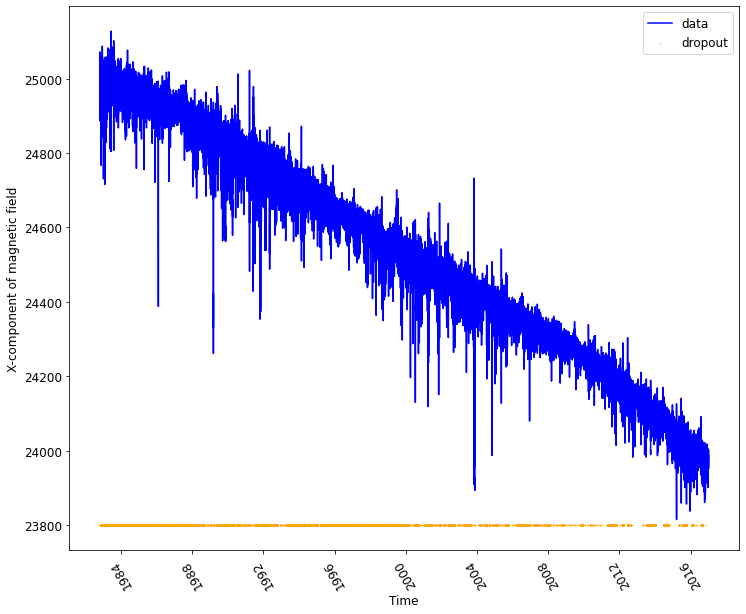

In [31]:
plt.figure(figsize=(12,10))

plt.plot(df['Time'], df['X'], label='data', color='blue')

plt.scatter(df_tuc['Time'][inds_tuc], [23800]*inds_len_tuc, color='orange', label='dropout', s=.25)

plt.xlabel('Time')
plt.ylabel('X-component of magnetic field')
plt.xticks(rotation=120)
plt.legend()

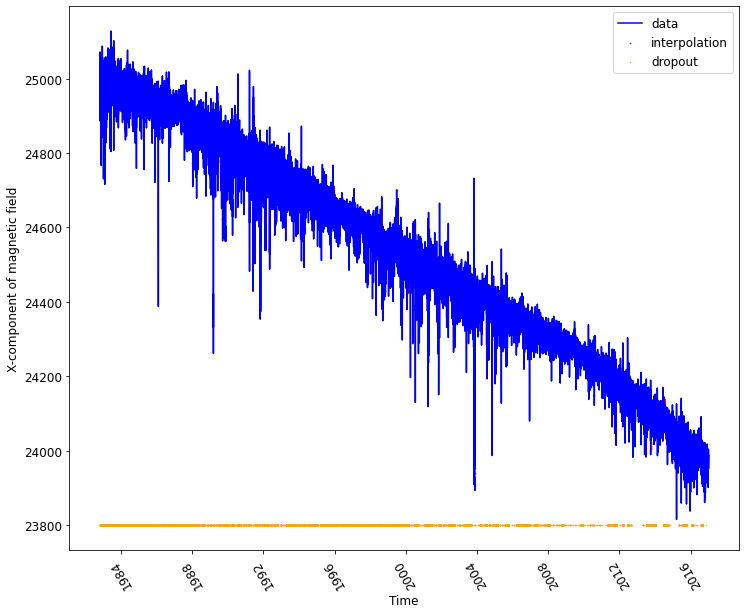

In [39]:
## Lets add the dropout and interpolation to double check
plt.figure(figsize=(12,10))

plt.plot(df['Time'], df['X'], label='data', color='blue')
plt.scatter(df['Time'][df['flag']==True], df['filled_cubic'][df['flag']==True], 
            label='interpolation', color='red', s=.5)
plt.scatter(df_tuc['Time'][inds_tuc], [23800]*inds_len_tuc, color='orange', label='dropout', s=.25)

plt.xlabel('Time')
plt.ylabel('X-component of magnetic field')
plt.xticks(rotation=120)
plt.legend()